# QFT using Digital Analog Quantum Computation

![Z-counting](https://learn.qiskit.org/content/v2/ch-algorithms/images/zbasis-counting.gif "z-counting")
![QFT-counting](https://learn.qiskit.org/content/v2/ch-algorithms/images/fourierbasis-counting.gif "qft-counting")

QFT operation is:
$$QFT|j\rangle = \frac{1}{2^{n/2}} \sum_{k=0}^{2^n-1}{e^{2\pi ijk/{2^n}}}|k\rangle$$

Unitary for QFT can be defined as:
$$ U_{QFT} = \frac{1}{2^{n/2}} \sum_{k=0}^{2^n-1}{e^{2\pi ijk/{2^n}}}|k\rangle \langle j|$$

## Simplifying QFT operation to superposition of all qubits:

$$QFT_N|x\rangle = \frac{1}{2^{n/2}} \sum_{y=0}^{2^n-1}{e^{2\pi ix\color{red}{y/{2^n}}}}|y\rangle$$

rewriting $y=y_1y_2y_3...y_n$ 

and $y/2^n=\sum_{k=1}^{n}{y_k/2^k}$
$$QFT_N|x\rangle = \frac{1}{2^{n/2}} \sum_{y=0}^{2^n-1}{e^{2\pi ix \color{red}{\sum_{k=1}^{n}{y_k/2^k}}}} \color{red}{|y_1,y_2,y_3...y_n\rangle}$$,

Exponent to the sum is just product of exponents: $a^{m+n}=a^ma^n$

Therefore,
$$QFT_N|x\rangle = \frac{1}{2^{n/2}} \sum_{y=0}^{2^n-1} \prod_{k=1}^{n} {e^{2\pi ix \color{red}{y_k/2^k}}} \color{red}{|y_1,y_2,y_3...y_n\rangle}$$,

Expand product:

$$QFT_N|x\rangle = \frac{1}{2^{n/2}} \sum_{y=0}^{2^n-1} {e^{2\pi ix \color{red}{\frac{y_1}{2}}}}{e^{2\pi ix \color{red}{\frac{y_2}{4}}}}{e^{2\pi ix \color{red}{\frac{y_3}{8}}}}...{e^{2\pi ix \color{red}{\frac{y_n}{2^n}}}} \color{red}{|y_1,y_2,y_3...y_n\rangle}$$,

We can expand $\sum_{y=0}^{2^n-1}$ for $y=y_1y_2y_3...y_n$ as $\sum_{y=0}^{2^n-1}{} = \sum_{y_1=0}^{1}{}\sum_{y_2=0}^{1}{}\sum_{y_3=0}^{1}{}...\sum_{y_n=0}^{1}{}$,

$$QFT_N|x\rangle = \frac{1}{2^{n/2}} \sum_{y_1=0}^{1}{}\sum_{y_2=0}^{1}{}\sum_{y_3=0}^{1}{}...\sum_{y_n=0}^{1}{} {e^{2\pi ix \color{red}{\frac{y_1}{2}}}}{e^{2\pi ix \color{red}{\frac{y_2}{4}}}}{e^{2\pi ix \color{red}{\frac{y_3}{8}}}}...{e^{2\pi ix \color{red}{\frac{y_n}{2^n}}}} \color{red}{|y_1,y_2,y_3...y_n\rangle}$$,

This can just be written as a tensor product:

$$QFT_N|x\rangle = \frac{1}{2^{n/2}} \bigotimes_{k = 1}^{n} {(|0\rangle + e^{\frac{2\pi ix}{2^k}}|1\rangle)}$$
$$QFT_N|x\rangle = \frac{1}{2^{n/2}} (|0\rangle + e^{\frac{2\pi ix}{2}}|1\rangle) \bigotimes (|0\rangle + e^{\frac{2\pi ix}{2^2}}|1\rangle) \bigotimes (|0\rangle + e^{\frac{2\pi ix}{2^3}}|1\rangle) \bigotimes .... \bigotimes (|0\rangle + e^{\frac{2\pi ix}{2^n}}|1\rangle) $$

## Designing QFT 

![QFT Circuit](https://learn.qiskit.org/content/v2/ch-algorithms/images/qft.png)

here,$UROT_k$ is applied as a controlled unitary to get $(|0\rangle + e^{\frac{2\pi ix}{2^k}}|1\rangle)$

$$UROT_k = \begin{bmatrix}
    1       & 0 \\
    0       & e^{\frac{2\pi i}{2^k}} \\
\end{bmatrix}$$


Consider input state $|x_1,x_2,x_3,...,x_n\rangle$
After the first application of Hadamard on $|x_1\rangle \rightarrow \frac{1}{\sqrt{2}}{(|0\rangle+e^{\frac{2\pi ix_1}{2}}|1\rangle)}$, if $|x_1\rangle=|0\rangle$, then after applying $H$ we get $\frac{1}{\sqrt{2}}{(|0\rangle+|1\rangle)}$, else, we get $\frac{1}{\sqrt{2}}{(|0\rangle-|1\rangle)}$, i.e. final state depends upon the binary value of $x_1$

$$H_1|x_1,x_2,x_3,...,x_n\rangle = \frac{1}{\sqrt{2}}{(|0\rangle+e^{\frac{2\pi ix_1}{2}}|1\rangle)}\bigotimes|x_2,x_3,...,x_n\rangle$$

After applying $UROT_2$ on qubit 1, the state changes to

$$\frac{1}{\sqrt{2}}{(|0\rangle+exp{(\frac{2\pi ix_1}{2}+\frac{2\pi ix_2}{2^2})}|1\rangle)}\bigotimes|x_2,x_3,...,x_n\rangle$$

After applying last $UROT_n$ gate on qubit 1 we get

$$\frac{1}{\sqrt{2}}{(|0\rangle+exp{(\frac{2\pi ix_1}{2}+\frac{2\pi ix_2}{2^2} + \frac{2\pi ix_3}{2^3} + ... + \frac{2\pi ix_n}{2^n})}|1\rangle)}\bigotimes|x_2,x_3,...,x_n\rangle$$

But $\frac{2\pi ix_1}{2}+\frac{2\pi ix_2}{2^2} + \frac{2\pi ix_3}{2^3} + ... + \frac{2\pi ix_n}{2^n} = \frac{2\pi ix}{2^n}$ in binary expansion

$$\frac{1}{\sqrt{2}}{(|0\rangle+exp{(\frac{2\pi ix}{2^n})}|1\rangle)}\bigotimes|x_2,x_3,...,x_n\rangle$$


AFter applying all the gates, final state will be:

$$\frac{1}{\sqrt{2}}{(|0\rangle+exp{(\frac{2\pi ix}{2^n})}|1\rangle)}\bigotimes \frac{1}{\sqrt{2}}{(|0\rangle+exp{(\frac{2\pi ix}{2^{n-1}})}|1\rangle)} \bigotimes \frac{1}{\sqrt{2}}{(|0\rangle+exp{(\frac{2\pi ix}{2^{n-2}})}|1\rangle)} \bigotimes \frac{1}{\sqrt{2}}{(|0\rangle+exp{(\frac{2\pi ix}{2^{2}})}|1\rangle)} \bigotimes \frac{1}{\sqrt{2}}{(|0\rangle+exp{(\frac{2\pi ix}{2^{2}})}|1\rangle)}$$


This is just the reverse of what we obtained in QFT above.
This can be fixed by applying SWAP gates at the end or using different endian format in our calculation.

# Digital Analog quantum computing

In DAQC paradigm, SQG (Single Qubit Gates) are implemented as a pulse/ digitally.
But TQG (Two Qubit Gates) are formulated as an Hamiltonian evolution, to take advantage of cross-talk between connected qubits.

Any two-qubit gate can be formulated as a target Hailtonian 
$$H_C = \sum_{(j,k)\in C} {g_{jk}Z^jZ^k}$$
here, $g_{jk}$ are chosen arbitrarily

Target hamiltonians, in turn can be implemented using multiple SQGs and resource hamiltonian.
Resource hamiltonian is defined below:

$$\bar{H}_C = \sum_{(j,k)\in C} {\bar{g_{jk}}Z^jZ^k}$$

here, $\bar{g_{jk}}$ are constant and non-tunable coupling coefficients




An analog block is the multi-qubit entangling operation consisting on the evolution of all qubits under the resource Hamiltonian, for a finite and tunable time $t$,
$$U_{\bar{H}_C} = exp(-it\bar{H}_C)$$



The evolution unitary $U_{H_C}$ under the target Hamiltonian $H_C$, for some time $t_f$ , is given by


$$U_{H_C}(t_f) = exp(it_fH_C)$$
$$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; = exp(it_f\sum_{(j,k)\in C} {g_{jk}Z^jZ^k})$$
$$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; = \prod_{(j,k)\in C}exp(it_f {g_{jk}Z^jZ^k})$$

which is equivalent to implementing two qubit gates of the form 
$$\color{blue}{ZZ_{jk}(\phi_{jk}) = exp(i\phi jkZ_jZ_k)}, \color{red}{\phi_{jk}=t_f g_{jk}mod(2π)}$$



## Core idea of DQAC
The core idea of a DAQC protocol is to find a way to effectively engineer the desired coefficients of the target Hamiltonian, $g_{jk}$, by tuning the times of the analog blocks of a digital-analog quantum circuit, which can comprise analog blocks and SQGs.


We construct a digital-analog quantum circuit which contains $c$ analog blocks, each running for some time $t_{mn}$ (with the indices $m, n$ running over the number of qubits, similarly to $j, k$), that implies a transformation
$$\{t_{mn}\}_{(m,n)\in C} \rightarrow \{g_{jk}\}_{(j,k)\in C} $$

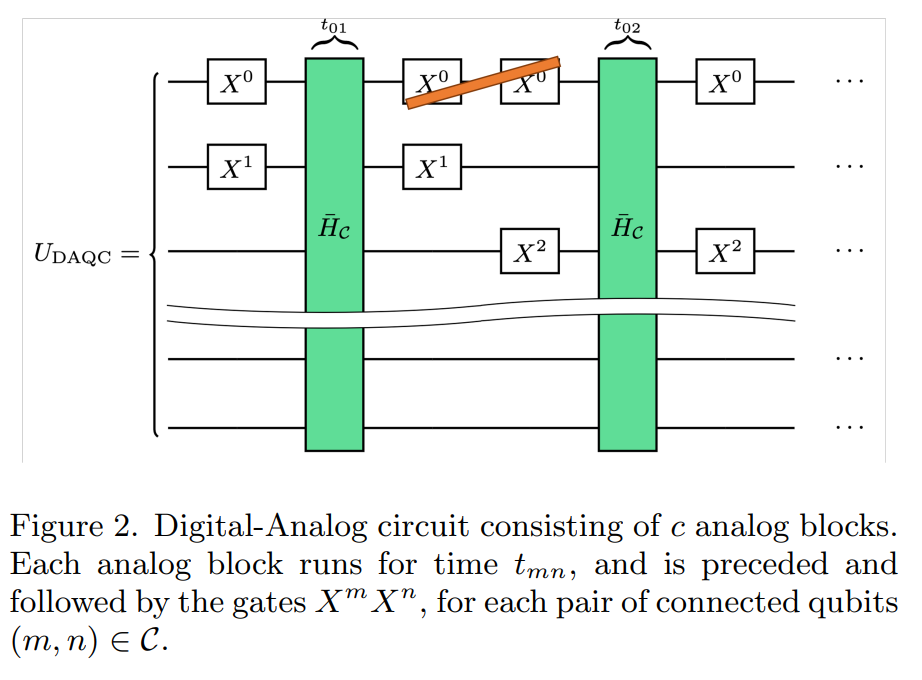
Assume our quantum circuit is similar to that of Figure above, where each of the analog blocks is preceded and followed by X gates placed on the same connected qubits appearing in the connectivity C (C pairs of connected qubits)




$$ U_{DAQC} = \prod_{(m,n)}{X^mX^n exp(-it_{mn}\bar{H_c})X^mX^n} $$
$$\;\;\;\;\;\;\;\;\;\;\; = \prod_{(m,n)}{ exp(-it_{mn}X^mX^n\bar{H_c}X^mX^n)} $$
$$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; = \prod_{(m,n)}{ exp(-i\sum_{(j,k)}{t_{mn}\bar{g_{jk}}}X^mX^nZ^jZ^kX^mX^n)} $$


## Time of analog blocks:

Writing above $U_{DAQC}$ equation as follows:

$$U_{DAQC} = \prod_{(m,n)}{ exp(-i\sum_{(j,k)}{t_{mn}\bar{g_{jk}}}(-1)^{\delta_{mj}+\delta_{mk}+\delta_{nj}+\delta_{nk}}Z^jZ^k)} $$

$$U_{DAQC} = \prod_{(m,n)}{ exp(-i\sum_{(j,k)}{t_{mn}\bar{g_{jk}}}M_{mnjk}Z^jZ^k)} $$

writing product of exponentials as sum in exponents:

$$U_{DAQC} = { exp(-i\sum_{(m,n)}\sum_{(j,k)}{t_{mn}\bar{g_{jk}}}M_{mnjk}Z^jZ^k)} $$

$M_{mnjk}$ contains $c$ elements taking values $\pm 1$ 

We can convert these elements $M_{mnjk}$ into a $c×c$ matrix with entries $M_{\alpha\beta}$ by “vectorizing” the pairs of coupled qubits $(m, n) \rightarrow \alpha; \rightarrow \beta$ characterized by a single index each: for 3-qubit ATA device

(m, n) = (0, 1) → α = 1 , (A1)

(m, n) = (0, 2) → α = 2 , (A2)

(m, n) = (1, 2) → α = 3 . (A3)

This also “vectorizes” the times $t_{mn} \rightarrow t$ and the coupling coefficients $\bar{g_{jk}} \rightarrow \bar{g}, g_{jk} \rightarrow g$.

The interpretation of the sign of a given element $M_{\alpha\beta}$ is the following: 
if $M_{\alpha\beta} = +1 (−1)$, 
it means that the effective coupling corresponding to the 
α-th connection, during the β-th analog block, is positive (negative).




Comparing DAQC unitary evolution $\color{red}{U_{DAQC} = { exp(-i\sum_{(m,n)}\sum_{(j,k)}{t_{mn}\bar{g_{jk}}}M_{mnjk}Z^jZ^k)}}$ to that of unitary evolution under target hamiltonian $\color{red}{U_{H_c}(t_f) = \prod_{(j,k)\in C} exp(it_fg_{jk}Z^jZ^k)}$, we get:

$$\color{blue}{Gt_f=Mt}, \text{where } G\equiv \frac{g_\beta}{\bar{g_\beta}}$$

Therefore, time for each analog block can be extracted as a vector:

$$\color{blue}{t = M^{-1}Gt_f}$$

## Number of analog blocks:

Performing a DAQC algorithm requires to construct a circuit with $c$ analog blocks for each target Hamiltonian that needs to be simulated, where c is the total number connections, this is due to the fact that, in the above equation $\color{blue}{t = M^{-1}Gt_f}$ we obtain a vector t of the analog block times which contains c elements

It is important to note that, in general, $c$ analog blocks are required to implement a target Hamiltonian, independently of how many coefficients of said Hamiltonian are equal to 0. As an example, we provide the digital-analog circuit for implementing a target Hamiltonian on a 4-qubit device with ATA connectivity, for which c = 6, in Fig. 4a.

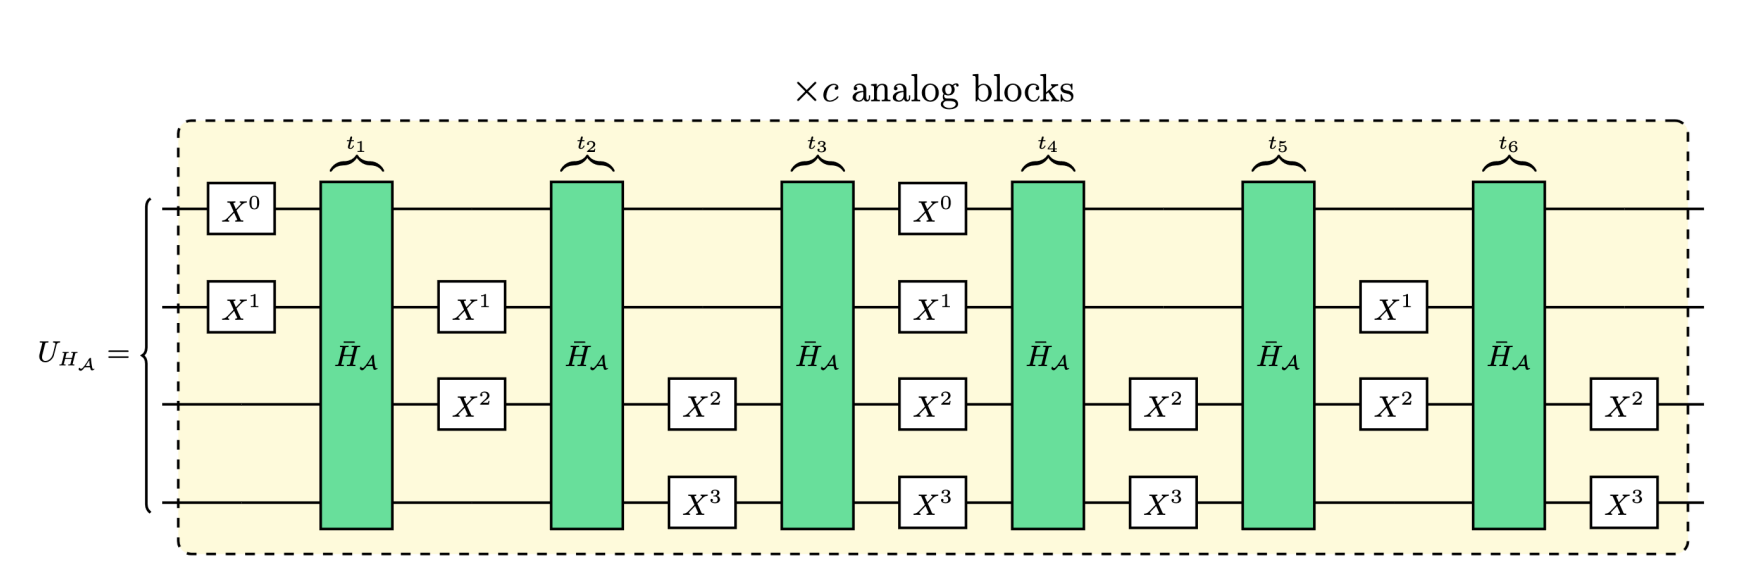

Each analog block looks like:

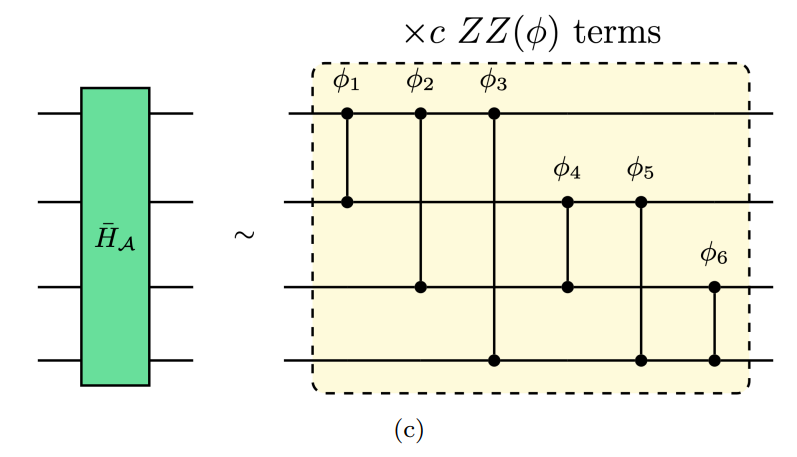

# Analyzing Runtimes:

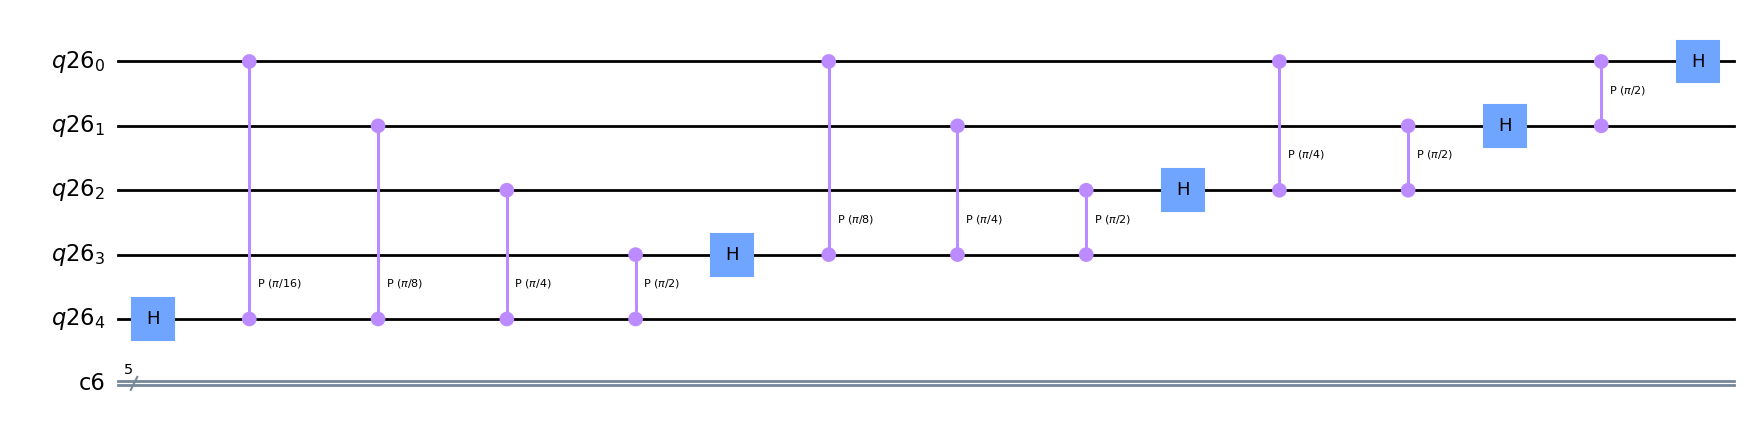

## 1. All to All connectivity QFT:

### For DQC
As it can be seen from the above image:
1. Number of Single Qubit Gates are just Hadamards applied on all the qubits: $O(N)$ $N$-> number of qubits
2. Number of Two Qubit Gates are CP gates $\forall i,j$, where $i>j$: $O(N^2)$ $N$-> number of qubits
3. Time (which is formulated form Depth of the circuit): Paper claims to be $\color{red}{O(N)}$, however it should be $\color{blue}{O(N^2)}$ 

### For DAQC:
1. Number of analog blocks: all consecutive cps/cnots require one target hamiltonian:
   + Therefore, number of target hamiltonians: $O(N)$
   + Each target hailtonian requires $O(N^2)$ analog blocks
   Therefore, number of analog blocks: $O(N^3)$
2. Number of two-qubit terms:
   + Each analog blocks contains $O(N^2)$ two-qubit terms. 
   Therefore, number of analog blocks: $O(N^3)\cdot O(N^2)=O(N^5)$
3. Duration: claim to be $\color{red}{O(N^{2.05})}$, need to verify???


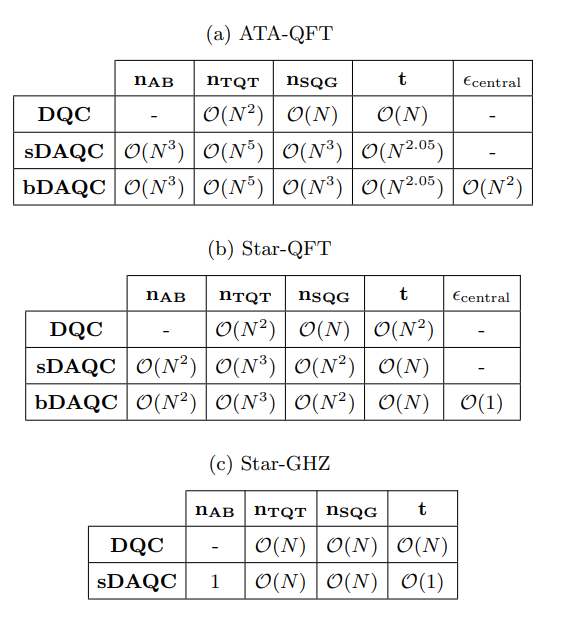

# Some code:

In [49]:
import qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, BasicAer
import numpy as np
from qiskit.visualization import plot_histogram

def custom_qft(data_qubits):
    qr_data = QuantumRegister(data_qubits)
    cr_data = ClassicalRegister(data_qubits)
    qc = QuantumCircuit(qr_data,cr_data)
    i = data_qubits
    while i>=1:
        n = i - 1
        qc.h(qr_data[n]) 
        for qubit in range(n):
            qc.cp(np.pi/2**(n-qubit), qr_data[qubit], qr_data[n])
        i = i-1
#     qc.measure(qr_data,cr_data)
    return qc

In [56]:
for i in range(2,50):
    qc = custom_qft(i)
    print(i, qc.depth(), qc.depth()/i)

2 3 1.5
3 6 2.0
4 10 2.5
5 15 3.0
6 21 3.5
7 28 4.0
8 36 4.5
9 45 5.0
10 55 5.5
11 66 6.0
12 78 6.5
13 91 7.0
14 105 7.5
15 120 8.0
16 136 8.5
17 153 9.0
18 171 9.5
19 190 10.0
20 210 10.5
21 231 11.0
22 253 11.5
23 276 12.0
24 300 12.5
25 325 13.0
26 351 13.5
27 378 14.0
28 406 14.5
29 435 15.0
30 465 15.5
31 496 16.0
32 528 16.5
33 561 17.0
34 595 17.5
35 630 18.0
36 666 18.5
37 703 19.0
38 741 19.5
39 780 20.0
40 820 20.5
41 861 21.0
42 903 21.5
43 946 22.0
44 990 22.5
45 1035 23.0
46 1081 23.5
47 1128 24.0
48 1176 24.5
49 1225 25.0


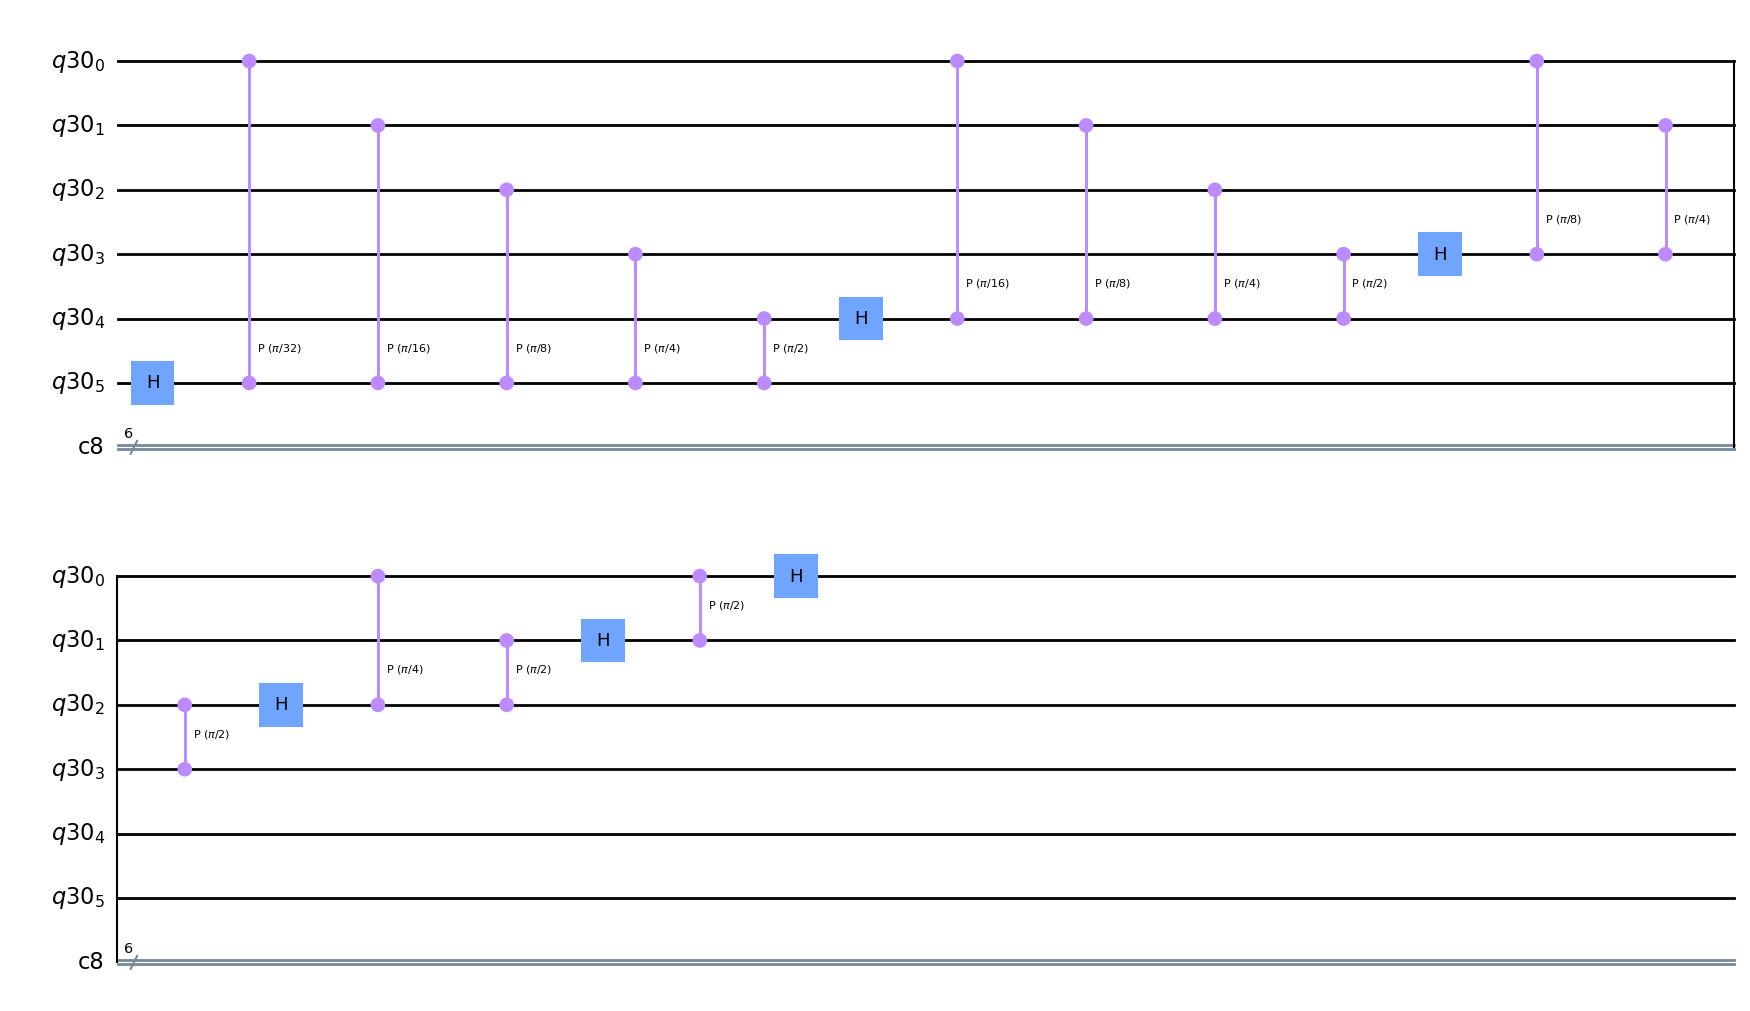

In [52]:
qc = custom_qft(5)
qc.draw(output='mpl')

In [40]:
# backend = BasicAer.get_backend("qasm_simulator")
# counts = execute(qc,shots=1000,backend=backend).result().get_counts()
# counts

In [41]:
# plot_histogram(counts)

In [42]:
backend = BasicAer.get_backend("statevector_simulator")
sv = execute(qc,shots=1000,backend=backend).result().get_statevector()
sv

array([0.1767767+0.00000000e+00j, 0.1767767+0.00000000e+00j,
       0.1767767+0.00000000e+00j, 0.1767767+0.00000000e+00j,
       0.1767767+0.00000000e+00j, 0.1767767+0.00000000e+00j,
       0.1767767+0.00000000e+00j, 0.1767767+0.00000000e+00j,
       0.1767767+0.00000000e+00j, 0.1767767+0.00000000e+00j,
       0.1767767+0.00000000e+00j, 0.1767767+0.00000000e+00j,
       0.1767767+0.00000000e+00j, 0.1767767+0.00000000e+00j,
       0.1767767+0.00000000e+00j, 0.1767767+0.00000000e+00j,
       0.1767767+0.00000000e+00j, 0.1767767+0.00000000e+00j,
       0.1767767+0.00000000e+00j, 0.1767767+0.00000000e+00j,
       0.1767767-2.77555756e-17j, 0.1767767-2.77555756e-17j,
       0.1767767-1.38777878e-17j, 0.1767767-1.38777878e-17j,
       0.1767767+0.00000000e+00j, 0.1767767+0.00000000e+00j,
       0.1767767+0.00000000e+00j, 0.1767767+0.00000000e+00j,
       0.1767767-2.77555756e-17j, 0.1767767-2.77555756e-17j,
       0.1767767+0.00000000e+00j, 0.1767767+0.00000000e+00j])

In [47]:
import qiskit.quantum_info as qi
state = qi.Statevector.from_instruction(qc)
state.draw(output='latex') 

<IPython.core.display.Latex object>